#### Q1. What are the key features of the wine quality data set? Discuss the importance of each feature in predicting the quality of wine.

Ans:

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<AxesSubplot:>

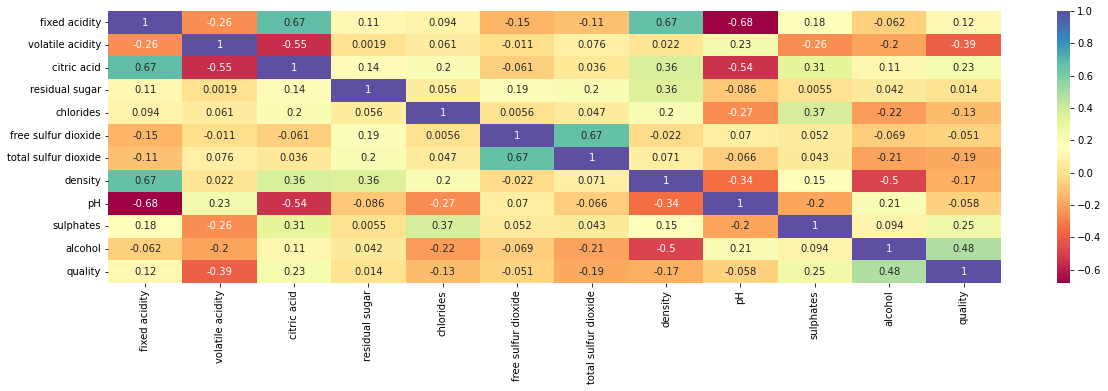

In [11]:
plt.figure(figsize = (20 ,5))
sns.heatmap(df.corr() , annot = True , cmap=plt.cm.Spectral)

In [10]:
df.corr().style.background_gradient(cmap=plt.cm.Spectral)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


### KeyFeatures :

1. Alcohol: the amount of alcohol in wine

2. Volatile acidity: are high acetic acid in wine which leads to an unpleasant vinegar taste

3. Sulphates: a wine additive that contributes to SO2 levels and acts as an antimicrobial and antioxidant

4. Citric Acid: acts as a preservative to increase acidity (small quantities add freshness and flavor to wines)

5. Total Sulfur Dioxide: is the amount of free + bound forms of SO2

6. Density: sweeter wines have a higher density

7. Chlorides: the amount of salt in the wine

8. Fixed acidity: are non-volatile acids that do not evaporate readily

9. pH: the level of acidity

10. Free Sulfur Dioxide: it prevents microbial growth and the oxidation of wine

11. Residual sugar: is the amount of sugar remaining after fermentation stops. The key is to have a perfect balance between — sweetness and sourness (wines > 45g/ltrs are sweet)

The most important key features in red wine dataset are  alcohol , sulphates ,citric acid , fixed acidity , residual suger.

This features are highly colinear to quality feature and they all have positive corelation to quality feature.

#### Q2. How did you handle missing data in the wine quality data set during the feature engineering process? Discuss the advantages and disadvantages of different imputation techniques.

Ans:

In [13]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In this dataset , No any missing values are present.

As we know , we follow some imputation techniques ,

### 1.Mean Imputation : when data is in  normal distribution then we follow mean imputation techniques

### 2.Median Imputation : when in data any outliers are present then we follow median imputation technique.

### 3.Mode Imputation : when feature is categorical then we are follow mode imputation technique.

1. Complete Case Analysis(CCA):-

This is a quite straightforward method of handling the Missing Data,

which directly removes the rows that have missing data i.e we consider only those rows where we have complete data

i.e data is not missing. This method is also popularly known as “Listwise deletion”.

Advantages:- 

    Easy to implement.
    
    No Data manipulation required.

Limitations:-

    Deleted data can be informative.
    
    Can lead to the deletion of a large part of the data.
    
    Can create a bias in the dataset, if a large amount of a particular type of variable is deleted from it.
    
    The production model will not know what to do with Missing data.

2. Arbitrary Value Imputation

This is an important technique used in Imputation as it can handle both the Numerical and Categorical variables. 

This technique states that we group the missing values in a column and assign them to a 

new value that is far away from the range of that column. 

Mostly we use values like 99999999 or -9999999 or “Missing” or “Not defined” for numerical & categorical variables.

Advantages:-

    Easy to implement.
    
    We can use it in production.
    
    It retains the importance of “missing values” if it exists.

Disadvantages:-

    Can distort original variable distribution.
    
    Arbitrary values can create outliers.
    
    Extra caution required in selecting the Arbitrary value.

#### Q3. What are the key factors that affect students' performance in exams? How would you go about analyzing these factors using statistical techniques?

Ans:

In [14]:
df = pd.read_csv('E:\ML_Datasets\stud.csv')

In [16]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [18]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']

In [19]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247


In [20]:
df['avg_score'] = df['total_score'] / 3 

In [21]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


Text(0.5, 1.0, 'average score w.r.to. race ethnicity')

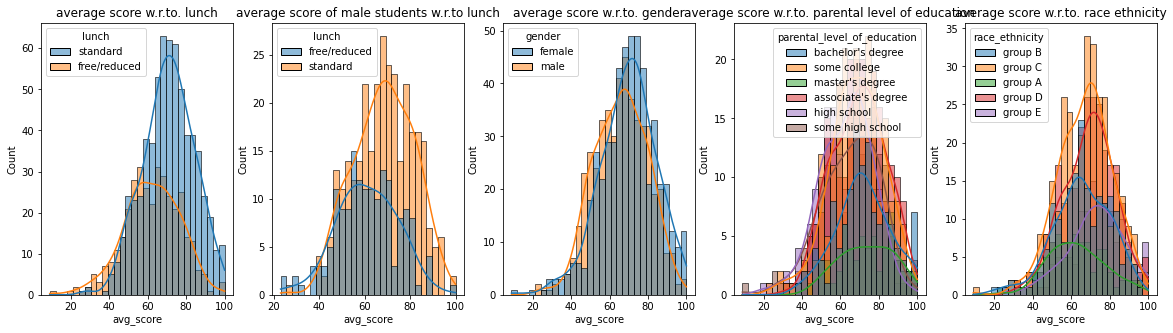

In [41]:
axis , fig = plt.subplots(1 , 5,figsize = (20 , 5))

plt.subplot(151)
sns.histplot(data = df , x = 'avg_score' , bins = 30 , hue = 'lunch' , kde = True )
plt.title('average score w.r.to. lunch')


plt.subplot(152)
sns.histplot(data = df[df['gender'] == 'male'] , x = 'avg_score' , bins = 30 , kde = True , hue = 'lunch')
plt.title('average score of male students w.r.to lunch')

plt.subplot(153)
sns.histplot(data = df , x = 'avg_score' , bins = 30 , kde = True , hue = 'gender')
plt.title('average score w.r.to. gender')

plt.subplot(154)
sns.histplot(data = df , x = 'avg_score' , bins = 30 , kde = True , hue = 'parental_level_of_education')
plt.title('average score w.r.to. parental level of education')


plt.subplot(155)
sns.histplot(data = df , x = 'avg_score' , bins = 30 , kde = True , hue = 'race_ethnicity')
plt.title('average score w.r.to. race ethnicity')

### Insights : 

#### from 1st figure average score w.r.to. lunch , we get known about who student consume standerd lunch their avg score is well as compre to free / reduced lunch.

#### from 2nd  figure average score of male students w.r.to. lunch , we get known about who  male student consume standerd lunch their avg score is well as compared to free / reduced lunch

#### from 3rd figure average score of male and female students w.r.to.gender , we get known about female students are well perform than male students

#### from 5th figure average score of male students w.r.to. race ethincity , we get known about Group A and Group B are worst performance in exam

#### Q4. Describe the process of feature engineering in the context of the student performance data set. How did you select and transform the variables for your model?

Ans:

### Exploratory Data Analysis (EDA):

The first step is to explore the data set and understand the distribution, relationships, and patterns in the data.

This can be done using various visualization and statistical techniques such as histograms, scatter plots,

correlation matrices, and summary statistics. EDA helps identify potential variables that are strongly correlated with

the outcome variable (e.g., academic performance) and may be good candidates for feature engineering.


### Data Cleaning and Preprocessing:

Next, we need to clean and preprocess the data to handle missing values, outliers, and categorical variables.

This may involve imputation, scaling, normalization, one-hot encoding, and other techniques to prepare the data for

feature engineering.

### Feature Selection:

Feature selection involves selecting the most relevant features from the original data set that are likely to be

predictive of the outcome variable. This can be done using various statistical and machine learning techniques such as

correlation analysis, feature importance ranking, and recursive feature elimination.

### Feature Transformation:

Feature transformation involves transforming the selected features into new features that are more informative and useful

for the machine learning model. This may involve various techniques such as scaling, normalization, polynomial expansion,

and feature interaction. For example, we can create new features such as the average of math and reading scores or the

difference between parents education levels.

### Feature Extraction:

Feature extraction involves deriving new features from existing features using domain-specific knowledge and expertise.

This may involve applying various algorithms such as principal component analysis (PCA), independent component analysis

(ICA), and other dimensionality reduction techniques to reduce the complexity of the data set.

### Model Training and Validation:

Finally, we need to train and validate a machine learning model using the transformed features.

This may involve various techniques such as cross-validation, hyperparameter tuning


#### Q5. Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to these features to improve normality?

Ans:

### Import prerquisite libraries

In [55]:
df = pd.read_csv('https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv')

### Head

In [56]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


### Tail

In [57]:
df.tail(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


### shape

In [58]:
df.shape

(1599, 12)

#### Insights : dataset contains 1599 records and 12 columns

#### information of dataset

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


#### categories count

In [59]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:>

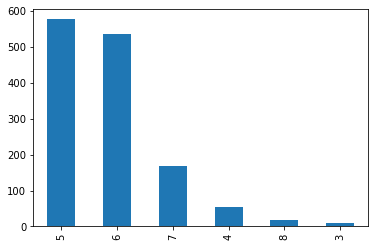

In [112]:
df['quality'].value_counts().plot(kind = 'bar')

#### Insights : Dataset is highly imbalance.

#### unique values

In [60]:
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

#### Missing values

In [61]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### Insights : Dataset does not having null value

#### Duplicates

In [62]:
df.duplicated().sum()

240

In [63]:
df[df.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


#### Insights : we have 240 records are duplicates . we simply drop that one

In [65]:
df.shape

(1599, 12)

In [66]:
df.drop_duplicates(inplace = True)

In [68]:
df.shape

(1359, 12)

#### segregate numerical feature and categorical feature and float features

In [127]:
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

In [128]:
categorical_feature

[]

In [129]:
numerical_feature = [feature for feature in df.columns if df[feature].dtype == 'int64']

In [130]:
numerical_feature

['quality']

In [134]:
float_features = [feature for feature in df.columns if df[feature].dtype == 'float64']

In [135]:
float_features

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

#### Outliers

In [75]:
df1 = df.drop('quality' ,axis = 1)

<AxesSubplot:>

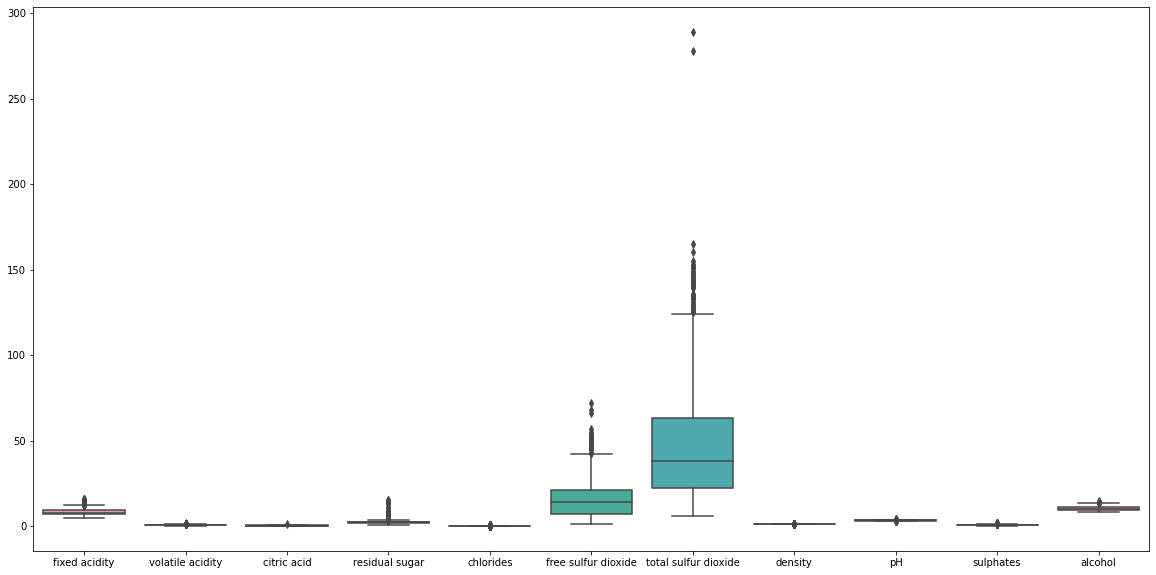

In [76]:
plt.figure(figsize = (20 , 10))
sns.boxplot(data = df1)

#### Insights : fixed acidity , residual suger , free sulfure dioxide , total sulfur dioxide and alcohol having ouliers but free sulfure dioxide , total sulfur dioxide having more no. of outliers

#### discriptive analysis

In [94]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1359.0,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
volatile acidity,1359.0,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
citric acid,1359.0,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
residual sugar,1359.0,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
chlorides,1359.0,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
free sulfur dioxide,1359.0,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
total sulfur dioxide,1359.0,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
density,1359.0,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
pH,1359.0,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
sulphates,1359.0,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


#### Correleation

In [95]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


<AxesSubplot:>

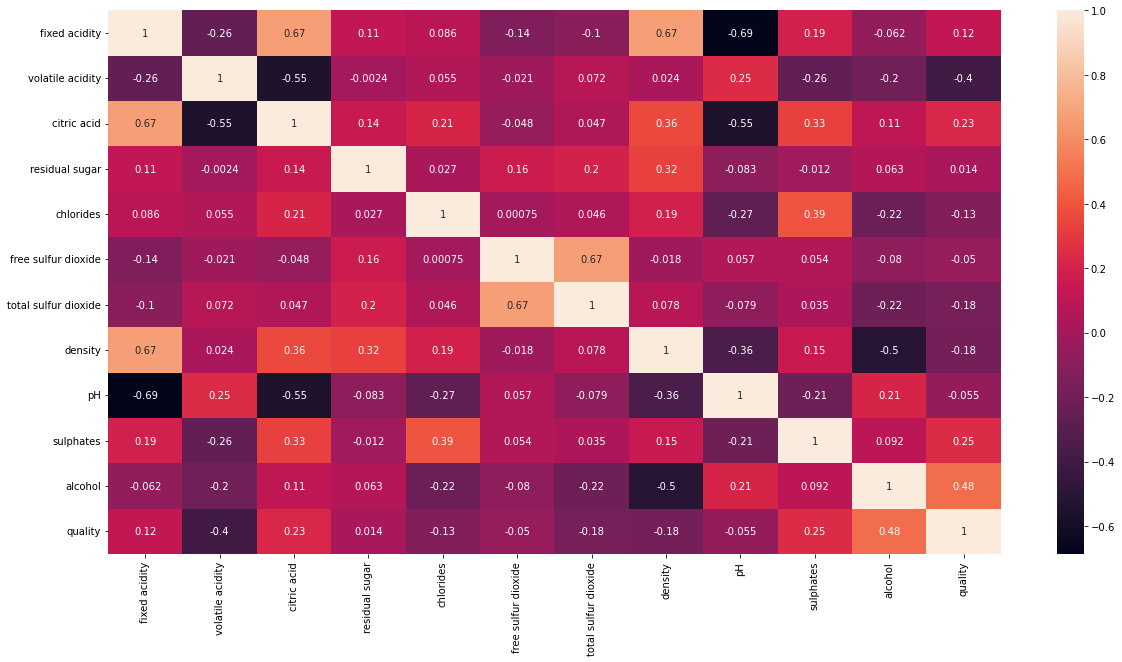

In [97]:
plt.figure(figsize = (20 , 10))
sns.heatmap(df.corr() , annot = True)

In [101]:
df.corr().style.background_gradient(cmap = plt.cm.Spectral)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


#### Histplot

Text(0.5, 1.0, 'chlorides vs quality')

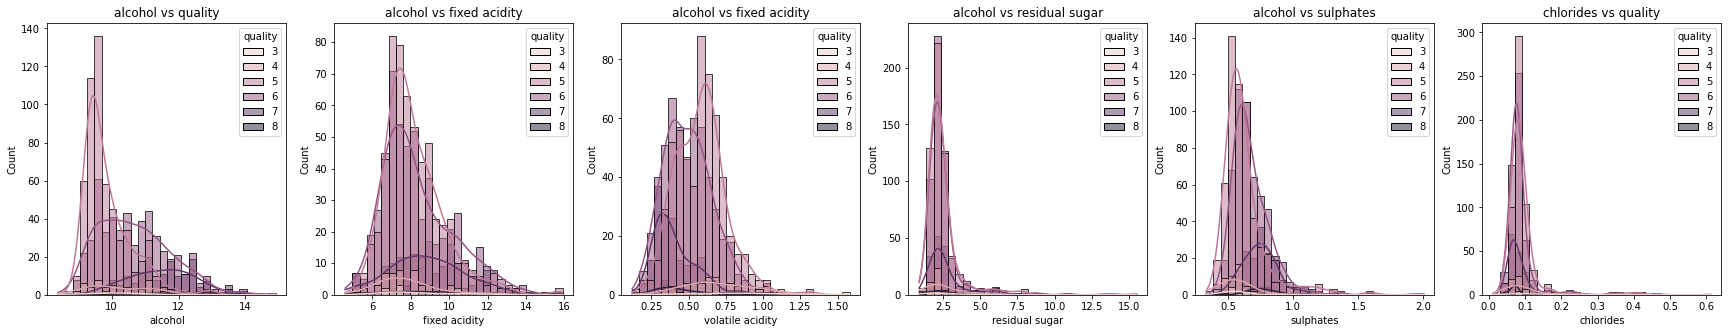

In [111]:
fig , axis = plt.subplots(1,6 , figsize = (30 , 5))


plt.subplot(161)
sns.histplot(data = df  , bins = 30 , x = 'alcohol' , kde = True , hue = 'quality')
plt.title('alcohol vs quality')

plt.subplot(162)
sns.histplot(data = df  , bins = 30 , x = 'fixed acidity' , kde = True , hue = 'quality')
plt.title('fixed acidity vs quality')

plt.subplot(163)
sns.histplot(data = df  , bins = 30 , x = 'volatile acidity' , kde = True , hue = 'quality')
plt.title('fixed acidity vs quality')

plt.subplot(164)
sns.histplot(data = df  , bins = 30 , x = 'residual sugar' , kde = True , hue = 'quality')
plt.title('residual sugar vs quality')

plt.subplot(165)
sns.histplot(data = df  , bins = 30 , x = 'sulphates' , kde = True , hue = 'quality')
plt.title('sulphates vs quality')

plt.subplot(166)
sns.histplot(data = df  , bins = 30 , x = 'chlorides' , kde = True , hue = 'quality')
plt.title('chlorides vs quality')

#### scatterplot

<AxesSubplot:xlabel='alcohol', ylabel='residual sugar'>

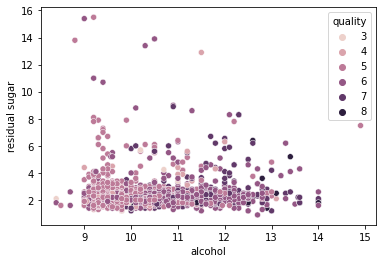

In [120]:
sns.scatterplot(x = 'alcohol' , y = 'residual sugar' ,data = df , hue = 'quality')

#### Insights : Here data is in negative covariance